Importing Library

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
import time
from sklearn.naive_bayes import GaussianNB , BernoulliNB


Reading the data

In [36]:
data = pd.read_csv("E:\\Machine learning\\Data\\predicting-earthquake-damage\\train_values.csv")
label = pd.read_csv("E:\\Machine learning\\Data\\predicting-earthquake-damage\\train_labels.csv")

Quick overview

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [38]:
data.shape

(260601, 39)

In [39]:
data.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
data.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

EDA (Exploring data analyst)

In [41]:
X = data.drop(['building_id'], axis=1)
y = label.drop(['building_id'], axis=1)

In [42]:
CONTINOUS_COLS = [
                'age', 
                'area_percentage', 
                'height_percentage']

CAT_COLS = list(X.drop(CONTINOUS_COLS,axis=1))
bin_var = [column for column in X.columns if X[column].nunique() == 2]

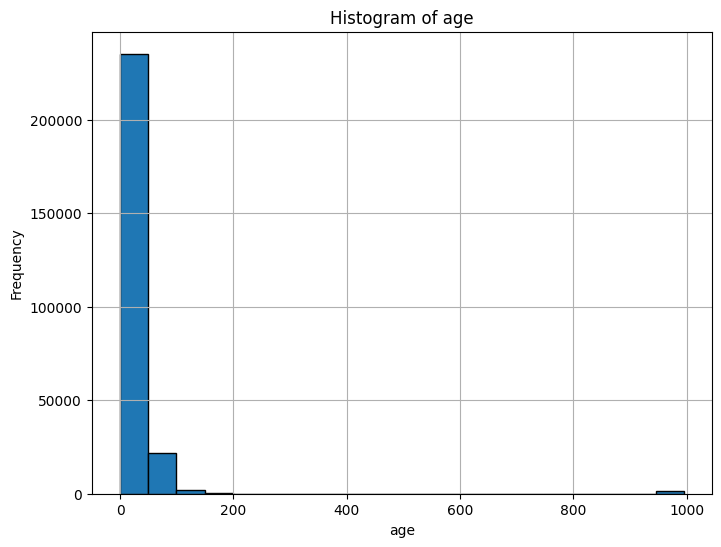

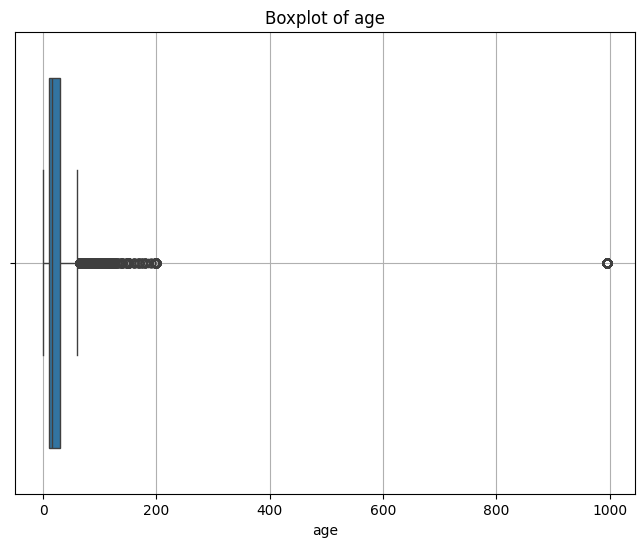

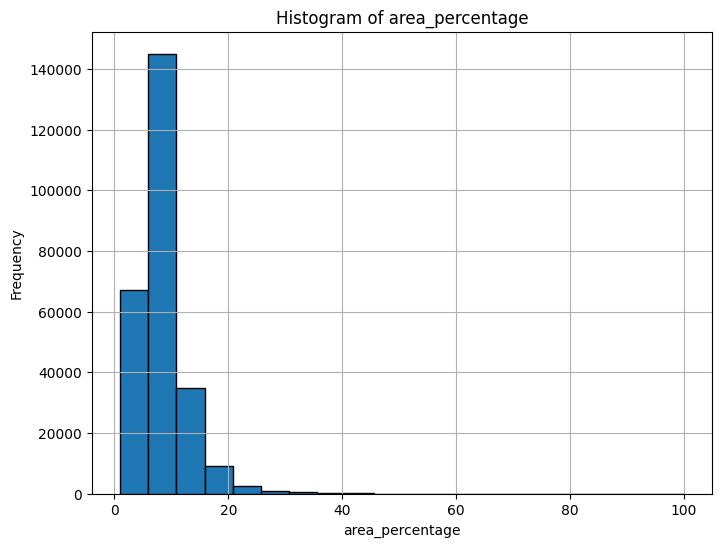

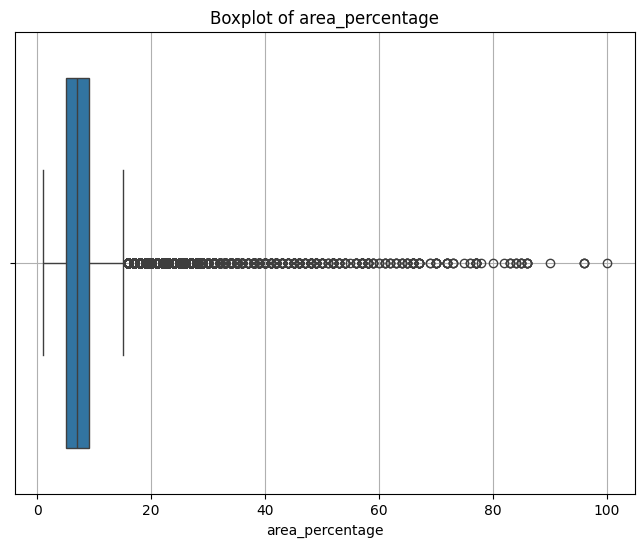

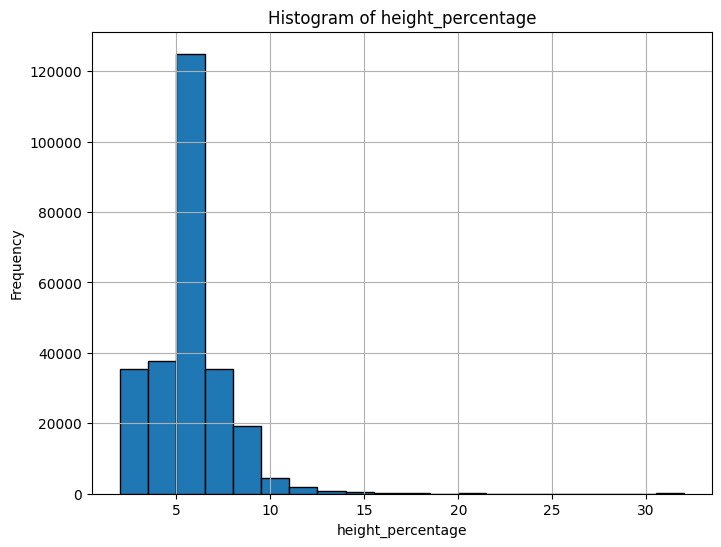

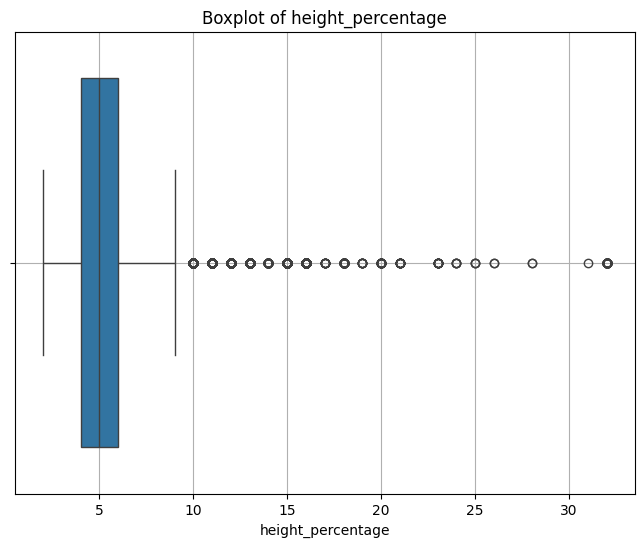

In [43]:
for col in CONTINOUS_COLS:
    plt.figure(figsize=(8, 6))
    plt.hist(X[col], bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

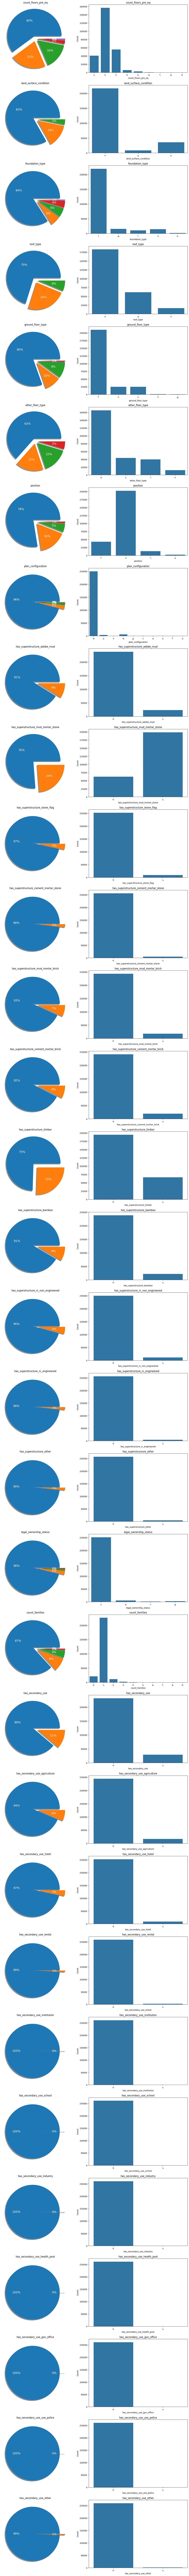

In [44]:
fig, ax = plt.subplots(len(CAT_COLS) - 3, 2, figsize=(14, len(CAT_COLS)*5))

for i, column in enumerate(CAT_COLS[3:], start=0):
    # Pie chart on the left
    ax[i, 0].pie(
        X[column].value_counts(), 
        shadow=True, 
        explode=[0.1 for _ in range(X[column].nunique())], 
        autopct='%1.f%%',
        textprops={'size': 14, 'color': 'white'}
    )
    ax[i, 0].set_title(f'{column}')
    
    # Countplot on the right
    sns.countplot(x=X[column], ax=ax[i, 1])
    ax[i, 1].set_title(f'{column}')
    ax[i, 1].set_ylabel('Count')
    ax[i, 1].set_xlabel(column)
    ax[i, 1].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()


In [45]:
def plot_correlation(method='spearman'):
    corr = data[CONTINOUS_COLS].corr(method=method)
    plt.figure(figsize = (15, 15), dpi = 300)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)]=True
    sns.heatmap(data=corr, mask=mask, annot=True, cmap='YlOrBr',annot_kws = {'size' : 6})

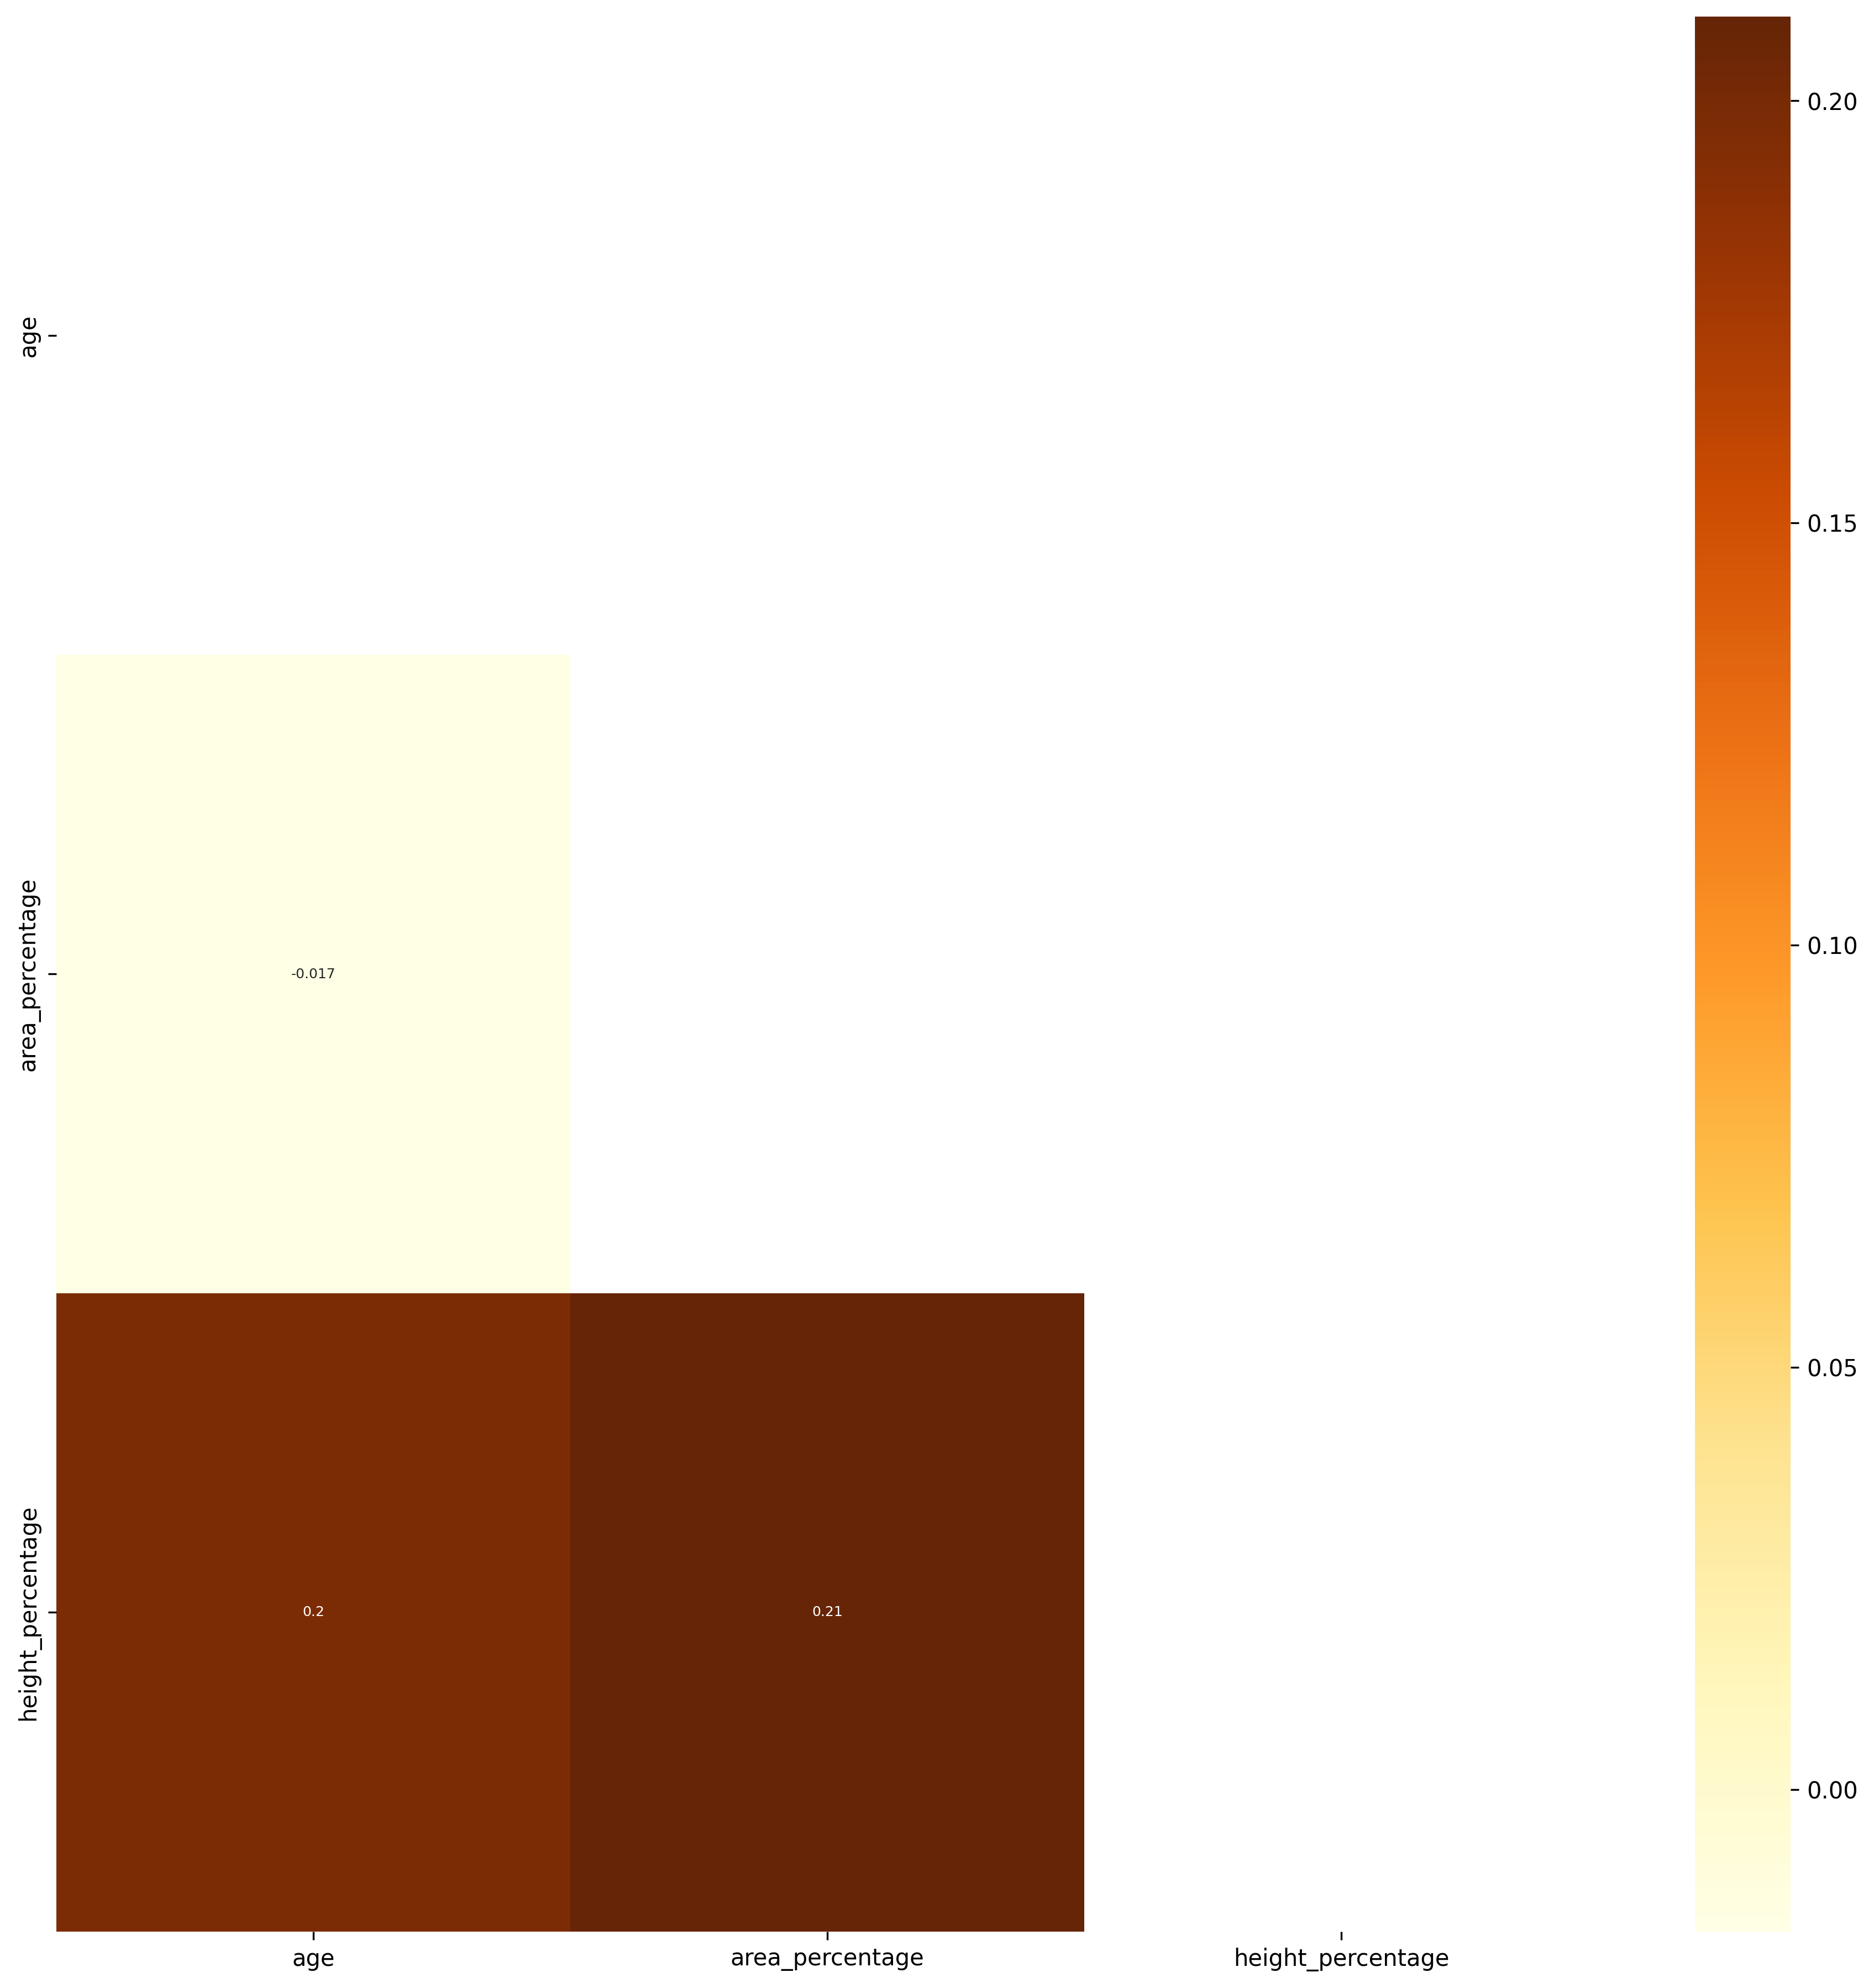

In [46]:
plot_correlation()

In [47]:
datacopy = data
datacopy["damage grade"] = y

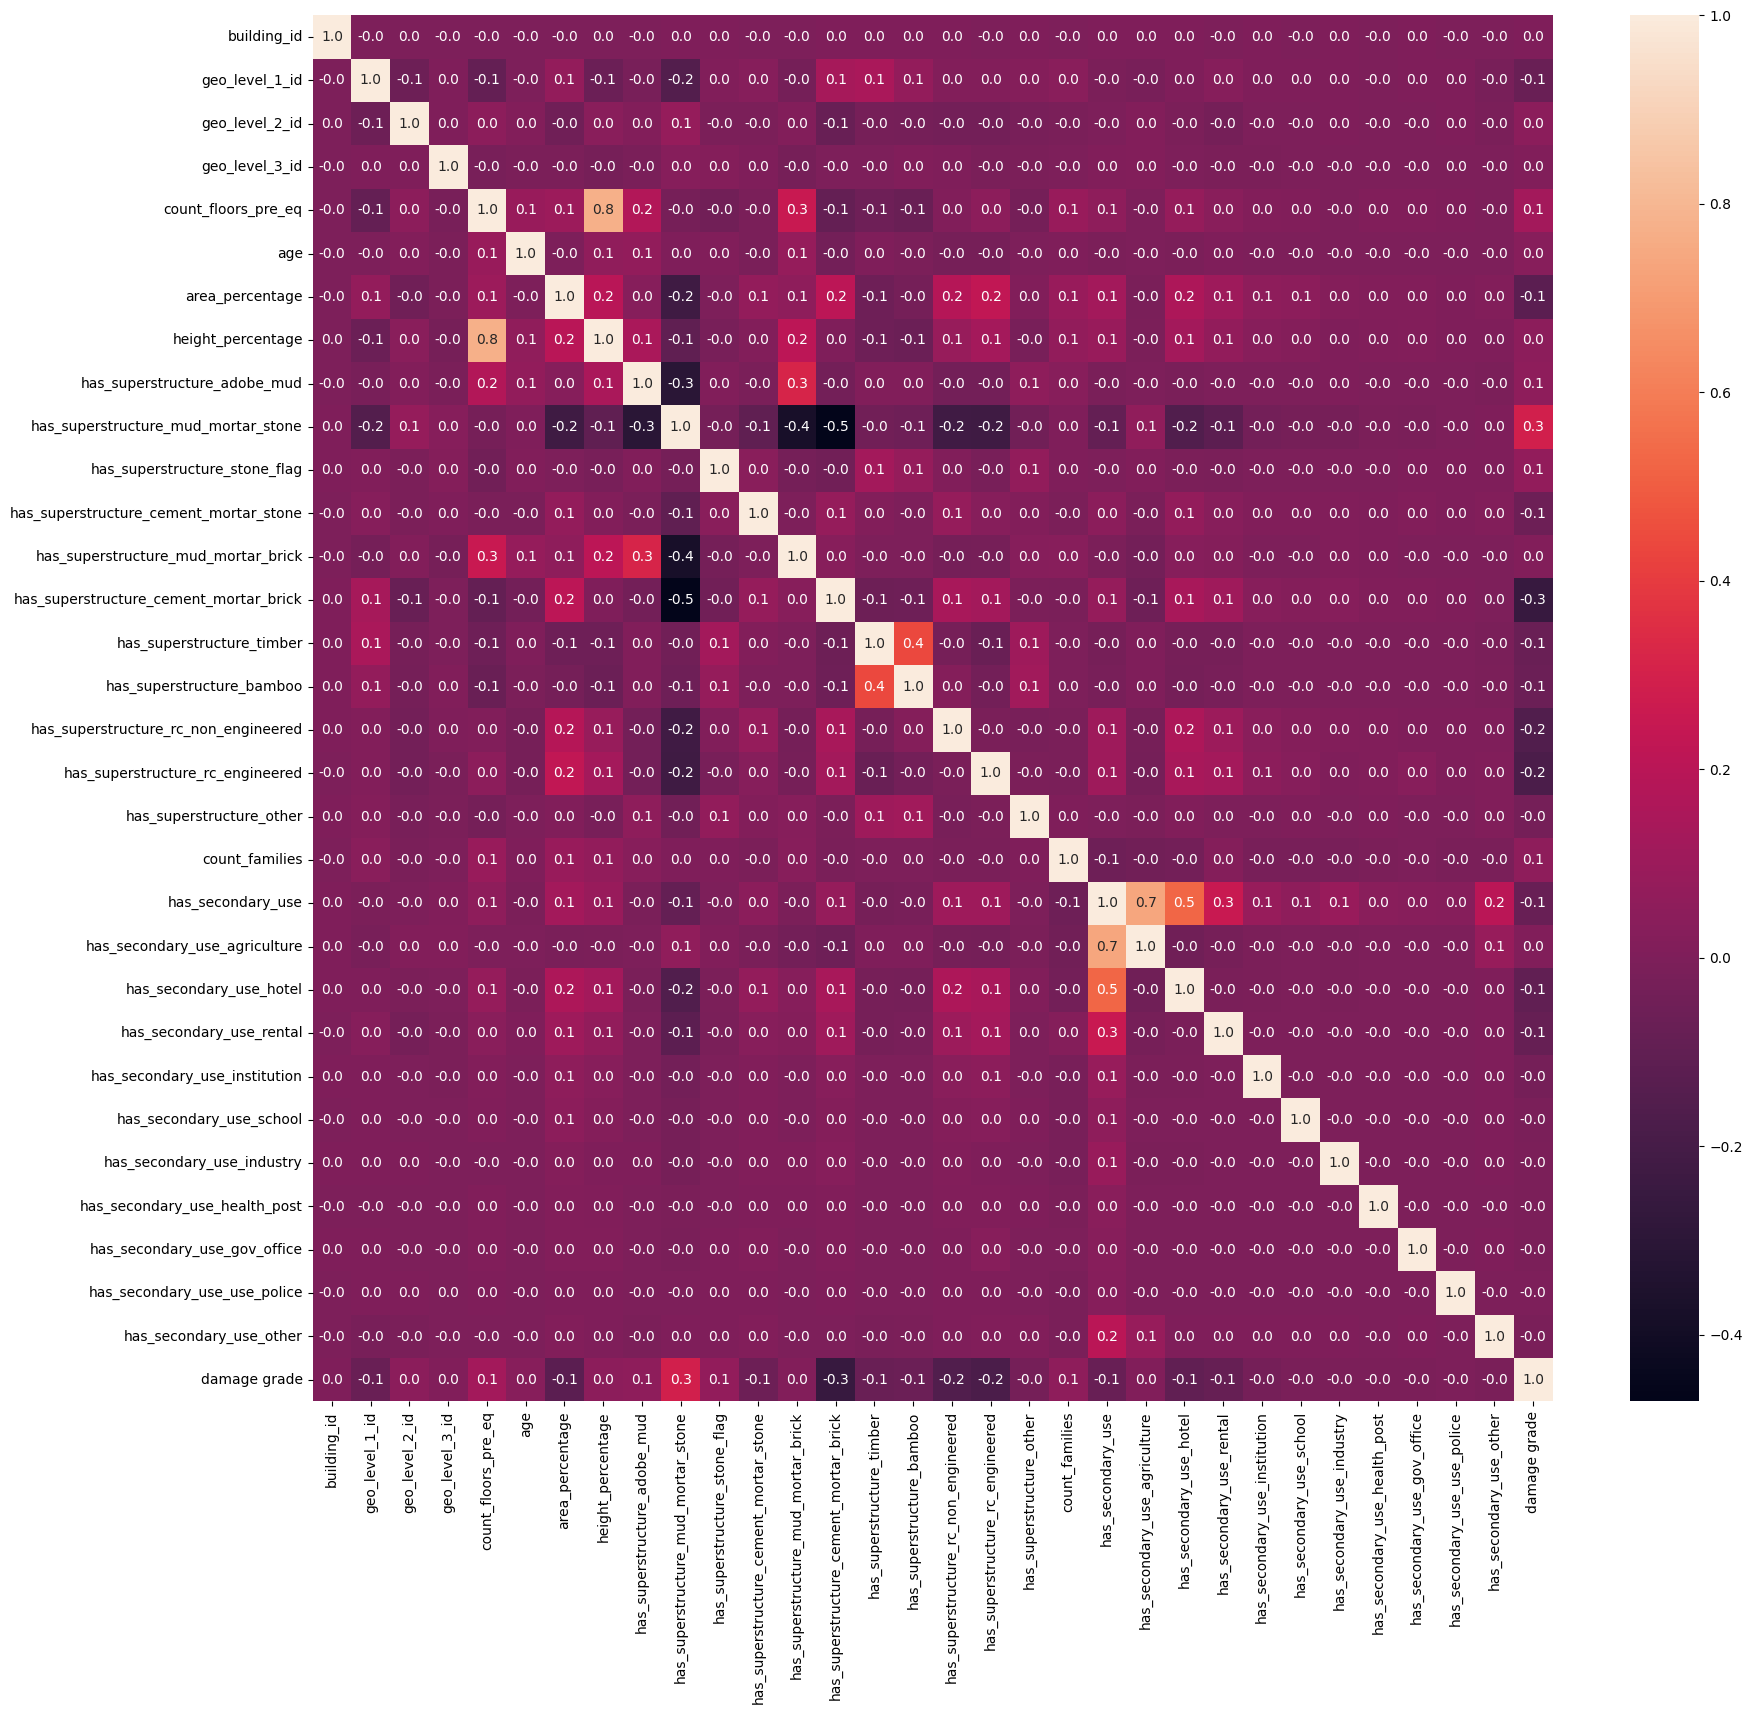

In [48]:
plt.figure(figsize = (20,18))
sns.heatmap(datacopy.select_dtypes(int).corr(), annot = True, fmt = '.1f')
plt.show()

Pre-Processing

In [49]:
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include='object').columns.tolist()

#Mã hóa onecode
# Khởi tạo một encoder one-hot
encoder = OneHotEncoder()

# Mã hóa từng cột phân loại và thêm vào DataFrame mới
for col in categorical_columns:
    # Lấy cột phân loại
    column_data = X[[col]]
    
    # Mã hóa dữ liệu
    encoded_data = encoder.fit_transform(column_data)
    
    # Tạo DataFrame mới từ dữ liệu mã hóa
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=[f'{col}_{category}' for category in encoder.categories_[0]])
    
    # Thêm các cột đã mã hóa vào DataFrame gốc
    X = pd.concat([X, encoded_df], axis=1)
    
# Loại bỏ các cột phân loại gốc
X.drop(columns=categorical_columns, inplace=True)

In [50]:
CAT_COLS = list(X.drop(CONTINOUS_COLS,axis=1))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1.Giảm số chiều dữ liệu xuống còn 03 chiều và hiển thị trực quan

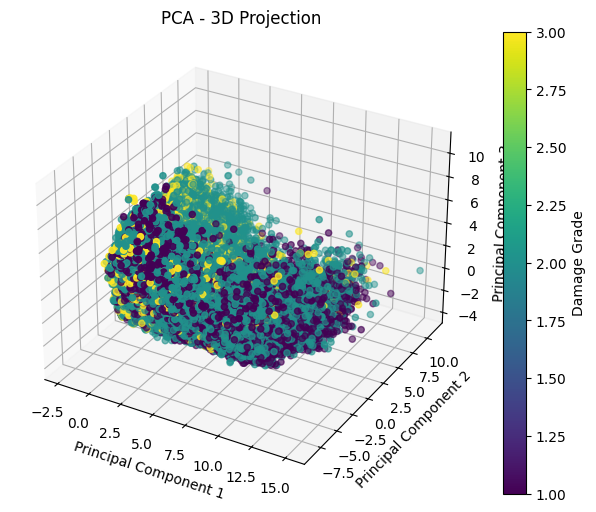

Phần trăm dữ liệu mất mát sau khi áp dụng PCA: 82.57779264379413 %


In [52]:
# Tiêu chuẩn hóa dữ liệu trước khi áp dụng PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
total_variance = sum(pca.explained_variance_)
# Áp dụng PCA cho dữ liệu đã được tiêu chuẩn hóa
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Hiển thị biểu đồ 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA - 3D Projection')
plt.colorbar(scatter, label='Damage Grade')
plt.show()

# Tính tổng phương sai của các thành phần đã giữ lại
explained_variance = sum(pca.explained_variance_)

# Tính phần trăm dữ liệu mất mát
loss_percentage = ((total_variance - explained_variance) / total_variance) * 100

print("Phần trăm dữ liệu mất mát sau khi áp dụng PCA:", loss_percentage, "%")

Modeling

Đánh giá độ quan trọng của các biến sử dụng phương pháp Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

# Xác định một mô hình Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên dữ liệu
rf.fit(X, y)  # X là tập dữ liệu đầu vào, y là biến mục tiêu

# Tính toán độ quan trọng của các biến
feature_importances = rf.feature_importances_

# Sắp xếp các biến theo độ quan trọng giảm dần
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_indices]

# In ra độ quan trọng của các biến
for i, feature in enumerate(sorted_features):
    print(f"{i+1}. {feature}: {feature_importances[sorted_indices[i]]}")

1. geo_level_3_id: 0.15412036099781065
2. geo_level_2_id: 0.13400154085466856
3. geo_level_1_id: 0.13397381426541552
4. age: 0.12358597432072527
5. area_percentage: 0.11404066938421181
6. height_percentage: 0.054417409525003714
7. count_families: 0.024677643602574562
8. count_floors_pre_eq: 0.016419341057861216
9. foundation_type_r: 0.015376792615329666
10. has_superstructure_mud_mortar_stone: 0.012480942770865262
11. has_superstructure_timber: 0.011226446329134802
12. ground_floor_type_v: 0.009520237389236528
13. land_surface_condition_t: 0.008801177261114857
14. has_superstructure_cement_mortar_brick: 0.008397250629280727
15. ground_floor_type_f: 0.008060093460931318
16. land_surface_condition_n: 0.007937111167940748
17. position_s: 0.007635610760334644
18. has_superstructure_adobe_mud: 0.007503693267984999
19. other_floor_type_q: 0.007347424977409934
20. roof_type_n: 0.0072599420569975735
21. has_secondary_use: 0.007024377697316686
22. position_t: 0.0068627111139569165
23. roof_type

Thay thế ba mức thiệt hại (1, 2, 3) trong labels thành các class 0, 1, 2 – tương ứng - và chuyển bài toán sang dạng
phân loại dữ liệu.

In [54]:
y = y['damage_grade'].map({1:0,2:1,3:2})

Phương pháp Navie Bayes


In [55]:
start_time = time.time()
# Pipeline xử lý cho biến liên tục
num_pl = Pipeline(
    steps=[ ('scaler', StandardScaler()) # Xử lý missing data bằng MinMax scaler
    ]
)



completed_pl1 = Pipeline(
    steps=[
            ("numerical", num_pl), 
            ("classifier", GaussianNB())
    ]
)


completed_pl2 = Pipeline(
    steps=[ 
            ("classifier", BernoulliNB())
    ]
)

completed_pl1.fit(X_train[CONTINOUS_COLS], y_train)
completed_pl2.fit(X_train[CAT_COLS], y_train)

# accuracy
y_pred_continous = completed_pl1.predict(X_test[CONTINOUS_COLS])
accuracy_continous = accuracy_score(y_test, y_pred_continous)

y_pred_categorical = completed_pl2.predict(X_test[CAT_COLS])
accuracy_categorical = accuracy_score(y_test, y_pred_categorical)

from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[('nb1', completed_pl1), 
                                                  ('nb2', completed_pl2),
                                        
                                                  ], 
                                                  weights=[0.05, 0.95],
                                      voting='soft')

# Huấn luyện Voting Classifier
voting_classifier.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
predictions = voting_classifier.predict(X_test)

# Đánh giá hiệu suất của Voting Classifier
print(classification_report(y_test, predictions))
end_time = time.time()
execution_time = end_time - start_time
print("Thời gian thực thi:", execution_time, "giây")


              precision    recall  f1-score   support

           1       0.44      0.56      0.49      7601
           2       0.64      0.37      0.47     44414
           3       0.42      0.69      0.52     26166

    accuracy                           0.50     78181
   macro avg       0.50      0.54      0.50     78181
weighted avg       0.55      0.50      0.49     78181

Thời gian thực thi: 3.43754506111145 giây


Logistic

In [56]:
start_time = time.time()
# Pipeline cho các liên tục
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Chuẩn hóa các biến số
])


# Kết hợp lại các pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, CONTINOUS_COLS),  # Áp dụng cho các biến số
        ('non_num', 'passthrough', CAT_COLS)  # Không làm gì với các biến không phải số
    ])

# Pipeline hoàn chỉnh
completed_pl = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0, max_iter=1000))
                               ])

completed_pl.fit(X_train, y_train)
# accuracy
y_pred = completed_pl.predict(X_test)
print(classification_report(y_test, y_pred))
end_time = time.time()
execution_time = end_time - start_time
print("Thời gian thực thi:", execution_time, "giây")

              precision    recall  f1-score   support

           1       0.56      0.26      0.36      7601
           2       0.59      0.87      0.70     44414
           3       0.51      0.19      0.28     26166

    accuracy                           0.58     78181
   macro avg       0.55      0.44      0.45     78181
weighted avg       0.56      0.58      0.53     78181

Thời gian thực thi: 64.53440928459167 giây


In [72]:
from keras.models import Sequential
from keras.layers import Dense

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Giảm số chiều bằng PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Khởi tạo mô hình Sequential
model = Sequential()

# Thêm lớp đầu vào và một lớp ẩn
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Thêm lớp ẩn thứ hai
model.add(Dense(32, activation='relu'))

# Thêm lớp đầu ra
model.add(Dense(3, activation='softmax'))


In [73]:
from keras.utils import to_categorical

# Chuyển đổi nhãn thành dạng one-hot
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)

In [75]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_one_hot, epochs=50, batch_size=10, validation_data=(X_val, y_val_one_hot))

Epoch 1/50
18242/18242 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.5861 - loss: 0.7978 - val_accuracy: 0.5851 - val_loss: 0.7954
Epoch 2/50
18242/18242 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.5903 - loss: 0.7947 - val_accuracy: 0.5894 - val_loss: 0.7926
Epoch 3/50
18242/18242 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.5956 - loss: 0.7893 - val_accuracy: 0.5886 - val_loss: 0.7913
Epoch 4/50
18242/18242 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.5956 - loss: 0.7895 - val_accuracy: 0.5956 - val_loss: 0.7886
Epoch 5/50
18242/18242 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.5989 - loss: 0.7859 - val_accuracy: 0.5960 - val_loss: 0.7878
Epoch 6/50
18242/18242 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.6004 - loss: 0.7842 - val_accuracy: 0.6031 - val_loss: 0.7858
Epoch 7/50
18242/18242 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.6027 - loss: 0.7842 - val_accuracy: 0.6014 - val_loss: 0.7828
Epoch 8/50
18242/18242 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 

In [ ]:
# Lấy ra các trọng số của mô hình Logistic Regression
coefficients = completed_pl.named_steps['classifier'].coef_

# In ra các trọng số
print("Các trọng số của mô hình Logistic Regression:")
print(coefficients)

Các trọng số của mô hình Logistic Regression:
[[-4.98404861e-02 -4.67960282e-02  7.07544704e-02  2.36156085e-02
   1.09205276e-04  6.58707079e-06 -1.74621944e-01 -1.28783161e-01
  -4.89230266e-01 -7.55771438e-02 -2.63258646e-03 -1.02133411e-01
   1.66215374e-01  1.39343213e-01  7.58968119e-02  1.22952638e-01
   1.39866468e-01  2.68105449e-02 -1.40791735e-01  6.61954457e-02
  -4.74056246e-02  5.94779723e-02  4.12642267e-02  5.41799514e-03
   9.96231193e-04  1.80839203e-03  4.90414657e-04  1.02900008e-03
   1.71738376e-06  4.08991754e-03 -6.74641431e-02 -2.42538792e-02
   5.87946051e-02  1.58634738e-02  2.67057080e-01 -5.22796386e-01
   1.46938530e-02  1.92258562e-01 -1.37551916e-01 -1.45627499e-01
   2.50255998e-01 -2.73782198e-01  2.75919987e-04  3.08745726e-01
  -7.24540787e-02  4.29121350e-03  8.60429353e-02 -2.77787848e-01
   2.25520202e-01 -6.66987065e-02  1.99728893e-03 -9.25980953e-03
   8.90377742e-02 -1.14698671e-01  3.67810816e-03  1.95839837e-03
  -4.20038067e-02 -2.91478156e

So sánh nhãn của các phương pháp phân loại với đầu ra của dự đoán

In [ ]:
def plot_confusion_matrix(test, pred, title):
    plt.figure(figsize=(15, 6))
    conf_matrix = confusion_matrix(test, pred)
    conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
    conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
    plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
    plt.title(title)
    plt.grid(False)
    plt.show()

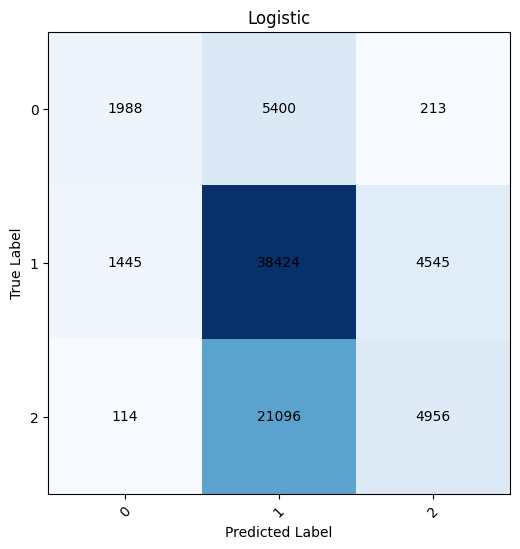

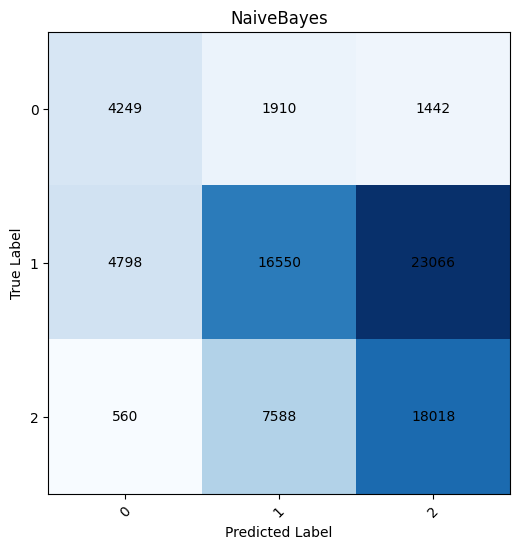

In [ ]:
# Kết quả logistic
plot_confusion_matrix(y_test, y_pred, "Logistic")

plot_confusion_matrix(y_test, predictions, "NaiveBayes")